<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

**CURSO DE PÓS-GRADUAÇÃO EM CIÊNCIA DE DADOS (BIG DATA PROCESSING AND ANALYTICS)**<p>
**Componente curricular:** MINERAÇÃO E ANÁLISE DE DADOS [TURMA 01D] - 2023/1 - Trilha 6.<br>

**Aluno:** ROBSON DE FREITAS SAMPAIO.<br>

**URL deste notebook:** https://github.com/rfsampaio/postgraduate_data_science/blob/main/notebooks/MA_T6_A.ipynb<br>
***

## Atividade - Trilha 6 - Parte A - Clusterização com "scikit-learn"

#### CASO: Clustering, Segmentando Países pela Força de Trabalho.

A partir deste notebook você vai criar modelos de clusterização para os países com base em suas características de força de trabalho. 

Em seguida, com base nos seus resultados, responda o **questionário do Moodle**. 

### Passos:

#### Importando as bibliotecas básicas.

In [293]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


#### Exploração dos dados.

Esta base de dados contém a percentagem da população empregada em diferentes indústrias em 26 países europeus em 1979.

- Country - o nome do país (identificador);
- Agr - % da força de trabalho empregada na agricultura;
- Min - % na mineração;
- Man - % na fabricação;
- PS - % nas indústrias de fornecimento de energia;
- Con - % em construção;
- SI - % nas indústrias de serviços;
- Fin - % em finanças;
- SPS - % em serviços sociais e pessoais;
- TC - % em transporte e comunicações.

Fonte: [https://statsandr.com/](https://statsandr.com/)

**Objetivo:** Segmentar os países em grupos para aplicação de diferentes políticas públicas empregando Clusterização.

In [294]:
df = pd.read_csv('http://meusite.mackenzie.br/rogerio/data_load/Eurojobs.csv')
df.head()

,Country,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC
0,Belgium,3.3,0.9,27.6,0.9,8.2,19.1,6.2,26.6,7.2
1,Denmark,9.2,0.1,21.8,0.6,8.3,14.6,6.5,32.2,7.1
2,France,10.8,0.8,27.5,0.9,8.9,16.8,6.0,22.6,5.7
3,W. Germany,6.7,1.3,35.8,0.9,7.3,14.4,5.0,22.3,6.1
4,Ireland,23.2,1.0,20.7,1.3,7.5,16.8,2.8,20.8,6.1


#### Inspecione os dados.

In [295]:
display(df.dtypes)
display(df.shape)
display(df.describe)
display(df.describe(exclude='object'))

Country     object
Agr        float64
Min        float64
Man        float64
PS         float64
Con        float64
SI         float64
Fin        float64
SPS        float64
TC         float64
dtype: object

(26, 10)

<bound method NDFrame.describe of            Country   Agr  Min   Man   PS   Con    SI   Fin   SPS   TC
0          Belgium   3.3  0.9  27.6  0.9   8.2  19.1   6.2  26.6  7.2
1          Denmark   9.2  0.1  21.8  0.6   8.3  14.6   6.5  32.2  7.1
2           France  10.8  0.8  27.5  0.9   8.9  16.8   6.0  22.6  5.7
3       W. Germany   6.7  1.3  35.8  0.9   7.3  14.4   5.0  22.3  6.1
4          Ireland  23.2  1.0  20.7  1.3   7.5  16.8   2.8  20.8  6.1
5            Italy  15.9  0.6  27.6  0.5  10.0  18.1   1.6  20.1  5.7
6       Luxembourg   7.7  3.1  30.8  0.8   9.2  18.5   4.6  19.2  6.2
7      Netherlands   6.3  0.1  22.5  1.0   9.9  18.0   6.8  28.5  6.8
8   United Kingdom   2.7  1.4  30.2  1.4   6.9  16.9   5.7  28.3  6.4
9          Austria  12.7  1.1  30.2  1.4   9.0  16.8   4.9  16.8  7.0
10         Finland  13.0  0.4  25.9  1.3   7.4  14.7   5.5  24.3  7.6
11          Greece  41.4  0.6  17.6  0.6   8.1  11.5   2.4  11.0  6.7
12          Norway   9.0  0.5  22.4  0.8   8.6  16.9   4

,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,19.130769,1.253846,27.007692,0.907692,8.165385,12.957692,4.000000,20.023077,6.546154
std,15.546569,0.970044,7.007763,0.376216,1.645586,4.575253,2.806564,6.829542,1.391469
min,2.700000,0.100000,7.900000,0.100000,2.800000,5.200000,0.500000,5.300000,3.200000
25%,7.700000,0.525000,23.000000,0.600000,7.525000,9.250000,1.225000,16.250000,5.700000
50%,14.450000,0.950000,27.550000,0.850000,8.350000,14.400000,4.650000,19.650000,6.700000
75%,23.675000,1.800000,30.200000,1.175000,8.975000,16.875000,5.925000,24.125000,7.075000
max,66.800000,3.100000,41.200000,1.900000,11.500000,19.100000,11.300000,32.400000,9.400000


#### Preparação dos dados.

Aqui você vai preparar o dado para o uso nos modelos. Você fará a seleção de atributos, tratamento de valores nulos, o encode dos dados, normalização e a separação dos dados de treinamento e teste.

#### Tratamento de Dados Ausentes.

Verifique as presença de valores ausentes e, se houverem, substitua pelo valor médio dos atributos.

In [296]:
# finding NaNs
df.isnull().sum() / len(df)

Country    0.0
Agr        0.0
Min        0.0
Man        0.0
PS         0.0
Con        0.0
SI         0.0
Fin        0.0
SPS        0.0
TC         0.0
dtype: float64

#### Normalize os dados.

Normalize os dados com o `StandardScaler` (melhor) ou a função `scale`.

$$ z_i = \frac{x_i - \bar{x}}{\sigma(x)}$$

E não esqueça de excluir dados não úteis ao treinamento. Depois de normalizar os dados os valores devem apresentar média próxima de 0 e desvio padrão próximo de 1.

In [297]:
from sklearn.preprocessing import StandardScaler

# define standard scaler
scaler = StandardScaler()

# transform data
df_scaled = pd.DataFrame(scaler.fit_transform(df.drop(columns=['Country'])),
                         columns=['Agr', 'Min', 'Man', 'PS', 'Con', 'SI', 'Fin', 'SPS', 'TC'])
df_scaled = pd.concat([df[['Country']], df_scaled], axis=1)

display(df_scaled)

,Country,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC
0,Belgium,-1.038446,-0.371997,0.086196,-0.020851,0.021452,1.369094,0.799401,0.982082,0.479202
1,Denmark,-0.651426,-1.213035,-0.757849,-0.834058,0.083424,0.366063,0.908410,1.818288,0.405913
2,France,-0.546471,-0.477127,0.071643,-0.020851,0.455256,0.856434,0.726728,0.384792,-0.620144
3,W. Germany,-0.815418,0.048521,1.279500,-0.020851,-0.536297,0.321484,0.363364,0.339996,-0.326985
4,Ireland,0.266928,-0.266868,-0.917926,1.063424,-0.412353,0.856434,-0.436037,0.116012,-0.326985
5,Italy,-0.211928,-0.687386,0.086196,-1.105126,1.136949,1.146198,-0.872073,0.011486,-0.620144
6,Luxembourg,-0.749821,1.940856,0.551875,-0.291920,0.641173,1.235356,0.218018,-0.122904,-0.253695
7,Netherlands,-0.841656,-1.213035,-0.655981,0.250217,1.074977,1.123908,1.017419,1.265795,0.186043
8,United Kingdom,-1.077805,0.153651,0.464560,1.334492,-0.784185,0.878723,0.617719,1.235930,-0.107116
9,Austria,-0.421837,-0.161738,0.464560,1.334492,0.517228,0.856434,0.327027,-0.481278,0.332623


#### Número de Clusters.

(Moodle) **Q1**. Qual o melhor número de clusters pela regra do cotovelo e pelo valor médio de silhueta aplicando o `KMeans`? (verifique de 2 a 10 clusters)

*Empregue random_state = 1234 no KMeans. Não empregue outros parâmetros não solicitados.*

- Regra do cotovelo

The within cluster sum of squares for 2 clusters is 171.65
The within cluster sum of squares for 3 clusters is 123.52
The within cluster sum of squares for 4 clusters is 103.14
The within cluster sum of squares for 5 clusters is 84.36
The within cluster sum of squares for 6 clusters is 74.53
The within cluster sum of squares for 7 clusters is 60.75
The within cluster sum of squares for 8 clusters is 51.93
The within cluster sum of squares for 9 clusters is 46.63
The within cluster sum of squares for 10 clusters is 39.39


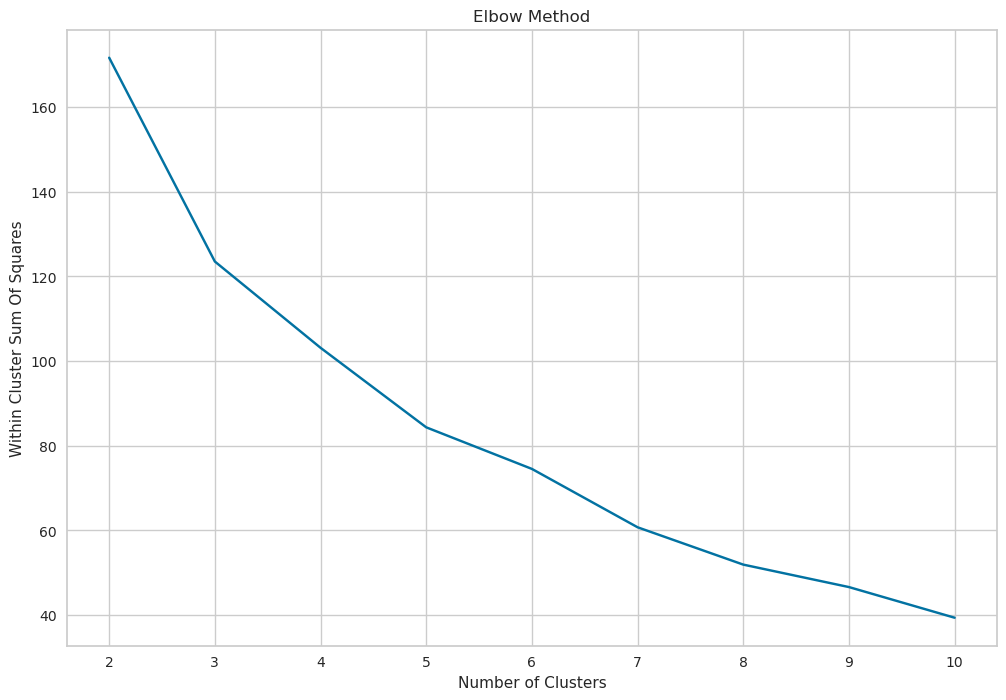

In [298]:
from sklearn.cluster import KMeans

# data
X = df_scaled.drop(columns=['Country'])

# create an empty dictionary to save the within cluster sum of square values
wcss = {}

# loop through the number of clusters (2 to 10 clusters)
for i in range(2,11):
  # run kmeans model
  kmeans = KMeans(n_clusters=i, random_state=1234).fit(X)
  # sum of squared distances of samples to their closest cluster center
  wcss[i] = (kmeans.inertia_)
  # print the within cluster sum of squares for each cluster number
  print(f'The within cluster sum of squares for {i} clusters is {wcss[i]:.2f}')

# visualization
plt.figure(figsize=(12,8))
plt.plot(list(wcss.keys()),list(wcss.values()))
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum Of Squares')
plt.show()

- Regra do valor médio de silhueta

The silhouette score for 2 clusters is 0.323
The silhouette score for 3 clusters is 0.278
The silhouette score for 4 clusters is 0.231
The silhouette score for 5 clusters is 0.202
The silhouette score for 6 clusters is 0.164
The silhouette score for 7 clusters is 0.200
The silhouette score for 8 clusters is 0.194
The silhouette score for 9 clusters is 0.182
The silhouette score for 10 clusters is 0.181


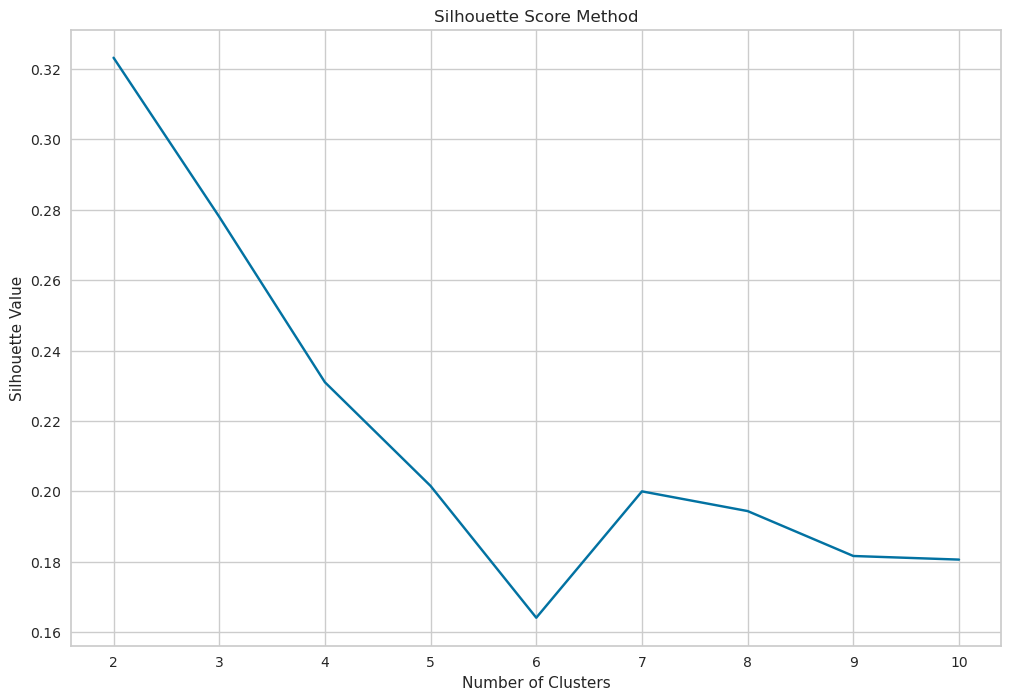

In [299]:
# create an empty dictionary for the silhouette score
s_score = {}

# loop through the number of clusters (2 to 10 clusters)
for i in range(2,11):
  # fit kmeans clustering model for each cluster number
  kmeans = KMeans(n_clusters=i, random_state=1234).fit(X)
  # make prediction
  classes = kmeans.predict(X)
  # calculate silhouette score
  s_score[i] = (silhouette_score(X, classes))
  # print the silhouette score for each cluster number
  print(f'The silhouette score for {i} clusters is {s_score[i]:.3f}')

# visualization
plt.figure(figsize=(12,8))
plt.plot(list(s_score.keys()),list(s_score.values()))
plt.title('Silhouette Score Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Value')
plt.show()

(Moodle) **Q2**. Qual o valor médio de silhueta para o melhor número de clusters na clusterização hierárquica (aglomerativa) para os esquemas de ligação (*linkage*) `ward` (padrão do `scikit-learn`), `complete` e `single`? (verifique de 2 a 10 clusters)

*Não empregue outros parâmetros não solicitados.*

In [300]:
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import AgglomerativeClustering

# create an empty dictionary for the silhouette score
s_score = {}

# loop through the number of clusters (2 to 10 clusters)
for i in range(2,11):

  # linkage='ward', default
  clf = AgglomerativeClustering(n_clusters=i).fit(X)
  
  # linkage='complete'
  # clf = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='complete').fit(X)

  # linkage='single'
  # clf = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='single').fit(X)

  labels = clf.labels_
  s_score[i] = np.round(metrics.silhouette_score(X, labels, metric='euclidean'),3)
  
  # print the silhouette score for each cluster number
  print(f'The silhouette score for {i} clusters is {s_score[i]:.3f}')

The silhouette score for 2 clusters is 0.456
The silhouette score for 3 clusters is 0.244
The silhouette score for 4 clusters is 0.251
The silhouette score for 5 clusters is 0.242
The silhouette score for 6 clusters is 0.179
The silhouette score for 7 clusters is 0.187
The silhouette score for 8 clusters is 0.175
The silhouette score for 9 clusters is 0.180
The silhouette score for 10 clusters is 0.178


#### Clusterização, 3 Clusters.

O número de clusters não segue um único critério e normalmente é feita uma análise conjunta de várias métricas. Métodos não supervisionados são analíticos e é esperado que você analise as mátricas e resultados para uma solução.

(Moodle) **Q3**. Verifique a distribuição da quantidade de elementos no modelo que fornece o melhor número de silhueta. Qual é essa distribuição e responda se essa é uma clusterização útil e adequada.

*Note, por exemplo a distribuição de 100, 43, 8 para 3 grupos é uma distribuição melhor que 100, 50, 1 e podemos considerar neste último caso que o grupo com 1 elemento é um outlier.*

In [301]:
# data
X = df_scaled.drop(columns=['Country'])

# model
agc = AgglomerativeClustering(n_clusters=2)

# fit
agc.fit(X)

# results
labelagc = agc.labels_
print(labelagc)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1]


In [302]:
dff = df
dff['Cluster'] = labelagc
dff

,Country,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC,Cluster
0,Belgium,3.3,0.9,27.6,0.9,8.2,19.1,6.2,26.6,7.2,0
1,Denmark,9.2,0.1,21.8,0.6,8.3,14.6,6.5,32.2,7.1,0
2,France,10.8,0.8,27.5,0.9,8.9,16.8,6.0,22.6,5.7,0
3,W. Germany,6.7,1.3,35.8,0.9,7.3,14.4,5.0,22.3,6.1,0
4,Ireland,23.2,1.0,20.7,1.3,7.5,16.8,2.8,20.8,6.1,0
5,Italy,15.9,0.6,27.6,0.5,10.0,18.1,1.6,20.1,5.7,0
6,Luxembourg,7.7,3.1,30.8,0.8,9.2,18.5,4.6,19.2,6.2,0
7,Netherlands,6.3,0.1,22.5,1.0,9.9,18.0,6.8,28.5,6.8,0
8,United Kingdom,2.7,1.4,30.2,1.4,6.9,16.9,5.7,28.3,6.4,0
9,Austria,12.7,1.1,30.2,1.4,9.0,16.8,4.9,16.8,7.0,0


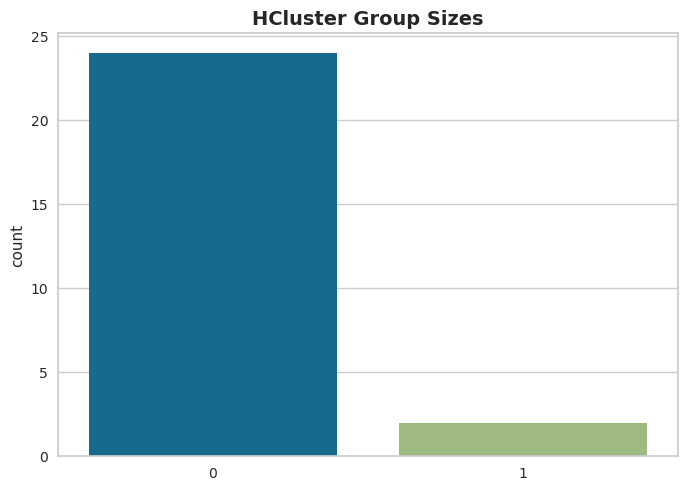

In [303]:
sns.countplot(x=labelagc)
plt.title('HCluster Group Sizes', fontsize=14, weight='bold')
plt.show()

#### Clusterização `Kmeans`, K=3.

Vamos considerar que nossa análise ao final leva ao uso do Kmeans para 3 grupos de dados. De fato essa parece ser a melhor opção embora não tenhamos explorado isso aqui. Verique que a distribuição dos dados é de fato melhor e analise para esse modelo os valores médios dos grupos e os países pertencentes a cada grupo.

(Moodle) **Q4**. Há um grupo que se caracteriza por um % médio maior da força de trabalho empregada na agricultura. Qual esse percentual e que países fazem parte dele?

In [304]:
# data
X = df_scaled.drop(columns=['Country'])

# model
clff = KMeans(n_clusters=3, random_state=1234)

# fit
clff.fit(X)

# results
labelsf = clff.labels_
print(labelsf)

[1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 2 2 2 2 2 2 2 0]


In [305]:
df['Cluster'] = labelsf
df.head()

,Country,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC,Cluster
0,Belgium,3.3,0.9,27.6,0.9,8.2,19.1,6.2,26.6,7.2,1
1,Denmark,9.2,0.1,21.8,0.6,8.3,14.6,6.5,32.2,7.1,1
2,France,10.8,0.8,27.5,0.9,8.9,16.8,6.0,22.6,5.7,1
3,W. Germany,6.7,1.3,35.8,0.9,7.3,14.4,5.0,22.3,6.1,1
4,Ireland,23.2,1.0,20.7,1.3,7.5,16.8,2.8,20.8,6.1,1


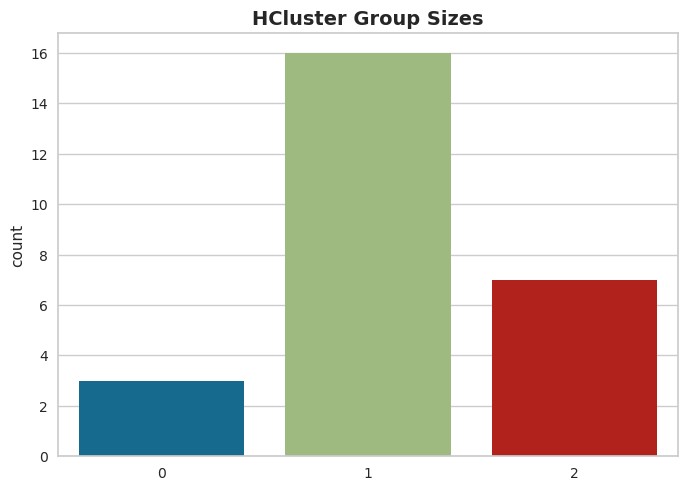

In [306]:
sns.countplot(x=labelsf)
plt.title('HCluster Group Sizes', fontsize=14, weight='bold')
plt.show()

In [307]:
df

,Country,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC,Cluster
0,Belgium,3.3,0.9,27.6,0.9,8.2,19.1,6.2,26.6,7.2,1
1,Denmark,9.2,0.1,21.8,0.6,8.3,14.6,6.5,32.2,7.1,1
2,France,10.8,0.8,27.5,0.9,8.9,16.8,6.0,22.6,5.7,1
3,W. Germany,6.7,1.3,35.8,0.9,7.3,14.4,5.0,22.3,6.1,1
4,Ireland,23.2,1.0,20.7,1.3,7.5,16.8,2.8,20.8,6.1,1
5,Italy,15.9,0.6,27.6,0.5,10.0,18.1,1.6,20.1,5.7,1
6,Luxembourg,7.7,3.1,30.8,0.8,9.2,18.5,4.6,19.2,6.2,1
7,Netherlands,6.3,0.1,22.5,1.0,9.9,18.0,6.8,28.5,6.8,1
8,United Kingdom,2.7,1.4,30.2,1.4,6.9,16.9,5.7,28.3,6.4,1
9,Austria,12.7,1.1,30.2,1.4,9.0,16.8,4.9,16.8,7.0,1


(Moodle) **Q4**. Há um grupo que se caracteriza por um % médio maior da força de trabalho empregada na agricultura. Qual esse percentual e que países fazem parte dele?

In [308]:
# higher average in 'Agr'
display(df.groupby('Cluster')['Agr'].mean())

# countries with higher average in 'Agr'
display(df.query('Cluster == 0'))

Cluster
0    52.300000
1    11.562500
2    22.214286
Name: Agr, dtype: float64

,Country,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC,Cluster
11,Greece,41.4,0.6,17.6,0.6,8.1,11.5,2.4,11.0,6.7,0
17,Turkey,66.8,0.7,7.9,0.1,2.8,5.2,1.1,11.9,3.2,0
25,Yugoslavia,48.7,1.5,16.8,1.1,4.9,6.4,11.3,5.3,4.0,0


(Moodle) **Q5**. Excetuando o grupo com % médio maior da força de trabalho empregada na agricultura e esse indicador, o que mais se destaca em diferenciar os outros dois grupos?

In [309]:
# clusters 1 and 2 higher difference in 'SI'
display(df.groupby('Cluster')['SI'].mean())

Cluster
0     7.700000
1    16.031250
2     8.185714
Name: SI, dtype: float64

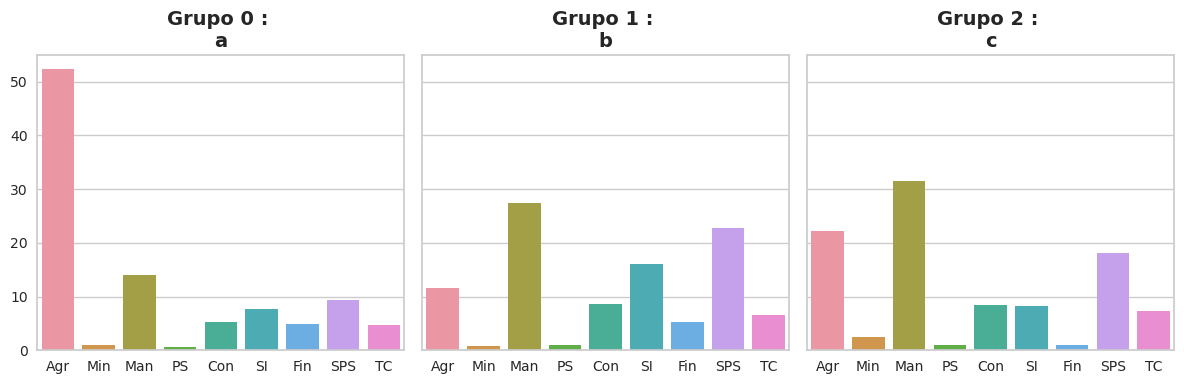

In [310]:
g = pd.DataFrame(df.groupby('Cluster').mean()).reset_index()

fig, ax = plt.subplots(1,3,figsize=(12,4),sharey=True)

nomes = ['a','b','c']

for i in range(len(g)):
  sns.barplot(data=g[g.Cluster==i].drop(columns='Cluster'),ax=ax[i])
  ax[i].set_title('Grupo ' + str(i) + ' : \n' + nomes[i], fontsize=14, weight='bold')

plt.tight_layout()
plt.show()